## Scikit learn Gaussian Naive Bayes classifier 

In [1]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import MNIST 
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from NearestCentroidClassifier import NearestCentroidClassifier
from NaiveBayesClassifier import NaiveBayesClassifier 
from GaussianNaiveBayes import GaussianNaiveBayes

## Importing the data 

In [2]:
# MNIST_Light 
mnist = MNIST.MNISTData('MNIST_Light/*/*.png')

X_train_ml, X_test_ml, y_train_ml, y_test_ml = mnist.get_data()

# SKlearn digits 
data, target = datasets.load_digits(return_X_y=True)

X_train_di, X_test_di, y_train_di, y_test_di = train_test_split(data, target, test_size=0.3)

# Summarized digits 
def num_to_cat(x): 
    if x < 5: 
        return 0
    elif x < 10: 
        return 1
    else: 
        return 2
    
X_train_sum = X_train_di.copy()
X_test_sum = X_test_di.copy()
for idx, ex in enumerate(X_train_di): 
    X_train_sum[idx, :] = list(map(num_to_cat, ex))
    
for idx, ex in enumerate(X_test_di): 
    X_test_sum[idx, :] = list(map(num_to_cat, ex))

### SKlearn Gaussian Naive Bayes Classifier 

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

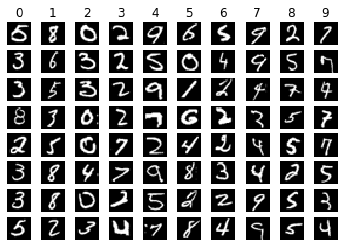

In [16]:
gnb = GaussianNB()
gnb.fit(X_train_ml, y_train_ml)
y_pred = gnb.predict(X_test_ml)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_ml, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_ml, y_pred))

mnist.visualize_wrong_class(y_pred, 8)

#### SKLearn digits 

In [23]:
gnb = GaussianNB()
gnb.fit(X_train_di, y_train_di)
y_pred = gnb.predict(X_test_di)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_di, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_di, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.86      0.75      0.80        59
           2       0.87      0.84      0.86        57
           3       0.97      0.69      0.80        51
           4       0.93      0.88      0.90        48
           5       0.87      0.91      0.89        45
           6       0.93      1.00      0.96        53
           7       0.84      0.93      0.88        67
           8       0.67      0.91      0.77        64
           9       0.87      0.70      0.78        47

    accuracy                           0.86       540
   macro avg       0.88      0.86      0.86       540
weighted avg       0.87      0.86      0.86       540


Confusion matrix SKLearn GNB:
[[49  0  0  0  0  0  0  0  0  0]
 [ 0 44  1  0  0  0  2  2  6  4]
 [ 0  1 48  0  1  0  0  0  7  0]
 [ 0  0  3 35  0  3  0  0 10  0]
 [ 0  1  0  0 42  0  0  3  2  0]
 [ 0  0  0

#### SKLearn digits summarized 

In [28]:
gnb = GaussianNB()
gnb.fit(X_train_sum, y_train_di)
y_pred = gnb.predict(X_test_sum)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_di, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_di, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.85      0.52      0.64        56
           2       0.98      0.67      0.80        64
           3       1.00      0.23      0.38        56
           4       0.98      0.90      0.94        58
           5       0.86      0.65      0.74        37
           6       0.92      0.92      0.92        60
           7       0.83      0.87      0.85        45
           8       0.36      0.98      0.53        45
           9       0.59      0.77      0.67        62

    accuracy                           0.75       540
   macro avg       0.84      0.75      0.75       540
weighted avg       0.85      0.75      0.75       540


Confusion matrix SKLearn GNB:
[[57  0  0  0  0  0  0  0  0  0]
 [ 0 29  1  0  0  0  2  1 17  6]
 [ 0  1 43  0  0  0  0  0 20  0]
 [ 0  1  0 13  0  0  0  0 22 20]
 [ 0  1  0  0 52  0  2  3  0  0]
 [ 0  1  0

## Nearest centroid 

#### MNIST_Light 

In [30]:
NCC = NearestCentroidClassifier()

NCC.fit(X_train_ml, y_train_ml)

y_pred = NCC.predict(X_test_ml)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_ml, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_ml, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       164
           1       0.71      0.97      0.82       152
           2       0.84      0.73      0.78       155
           3       0.74      0.76      0.75       154
           4       0.75      0.76      0.75       143
           5       0.72      0.69      0.70       141
           6       0.90      0.86      0.88       143
           7       0.95      0.80      0.87       158
           8       0.79      0.72      0.75       132
           9       0.76      0.80      0.78       158

    accuracy                           0.80      1500
   macro avg       0.81      0.80      0.80      1500
weighted avg       0.81      0.80      0.80      1500


Confusion matrix SKLearn GNB:
[[150   0   2   0   0   6   3   1   2   0]
 [  0 148   0   0   0   2   0   0   2   0]
 [  0  15 113   8   2   3   3   1   8   2]
 [  1   5   8 117   1   7   1   2   8   4]
 [ 

#### SKLearn digits  

In [31]:
NCC = NearestCentroidClassifier()

NCC.fit(X_train_di, y_train_di)

y_pred = NCC.predict(X_test_di)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_di, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_di, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.78      0.77      0.77        56
           2       0.94      0.86      0.90        51
           3       0.96      0.85      0.90        61
           4       0.98      0.91      0.95        58
           5       1.00      0.87      0.93        54
           6       0.94      0.98      0.96        49
           7       0.81      0.96      0.88        48
           8       0.86      0.84      0.85        58
           9       0.70      0.91      0.80        47

    accuracy                           0.89       540
   macro avg       0.90      0.89      0.89       540
weighted avg       0.90      0.89      0.89       540


Confusion matrix SKLearn GNB:
[[57  0  0  0  1  0  0  0  0  0]
 [ 0 43  3  1  0  0  3  0  1  5]
 [ 0  1 44  1  0  0  0  2  2  1]
 [ 0  1  0 52  0  0  0  4  1  3]
 [ 0  2  0  0 53  0  0  2  1  0]
 [ 0  0  0

#### SKLearn summarized digits 

In [32]:
NCC = NearestCentroidClassifier()

NCC.fit(X_train_sum, y_train_di)

y_pred = NCC.predict(X_test_sum)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_di, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_di, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.72      0.77      0.74        56
           2       0.93      0.82      0.87        51
           3       0.94      0.84      0.89        61
           4       0.95      0.91      0.93        58
           5       0.98      0.89      0.93        54
           6       0.94      0.98      0.96        49
           7       0.85      0.94      0.89        48
           8       0.82      0.78      0.80        58
           9       0.72      0.91      0.80        47

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.89      0.88      0.88       540


Confusion matrix SKLearn GNB:
[[57  0  0  0  1  0  0  0  0  0]
 [ 0 43  3  0  0  0  3  0  2  5]
 [ 0  3 42  3  0  0  0  1  2  0]
 [ 0  2  0 51  0  0  0  4  2  2]
 [ 0  2  0  0 53  0  0  2  1  0]
 [ 0  0  0

## Naive Bayes Classifier 

#### MNIST Light 

In [5]:
nbc = NaiveBayesClassifier()

nbc.fit(X_train_ml, y_train_ml)

y_pred = nbc.predict(X_test_ml)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_ml, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_ml, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       164
           1       0.44      0.91      0.59       152
           2       0.72      0.55      0.62       155
           3       0.71      0.56      0.63       154
           4       0.61      0.64      0.62       143
           5       0.55      0.57      0.56       141
           6       0.84      0.61      0.70       143
           7       0.76      0.55      0.64       158
           8       0.52      0.46      0.49       132
           9       0.54      0.59      0.57       158

    accuracy                           0.62      1500
   macro avg       0.65      0.62      0.62      1500
weighted avg       0.66      0.62      0.62      1500


Confusion matrix SKLearn GNB:
[[119   5   7   2   2  19   5   0   2   3]
 [  0 138   0   0   0   4   1   0   9   0]
 [  3  24  85   8   7   8   3   0  12   5]
 [  2  16  13  87   3  11   0   0  16   6]
 [ 

#### SKlearn digits 

In [3]:
nbc = NaiveBayesClassifier()

nbc.fit(X_train_di, y_train_di)

y_pred = nbc.predict(X_test_di)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_di, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_di, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.85      0.91      0.88        56
           2       0.96      0.90      0.93        60
           3       0.88      0.84      0.86        45
           4       0.93      0.96      0.95        56
           5       0.96      0.87      0.91        55
           6       0.98      0.98      0.98        43
           7       0.90      0.96      0.93        49
           8       0.89      0.86      0.88        58
           9       0.81      0.87      0.84        63

    accuracy                           0.91       540
   macro avg       0.92      0.91      0.92       540
weighted avg       0.92      0.91      0.91       540


Confusion matrix SKLearn GNB:
[[54  0  0  0  1  0  0  0  0  0]
 [ 0 51  1  0  0  0  0  0  0  4]
 [ 0  1 54  2  0  0  0  1  1  1]
 [ 0  2  1 38  0  0  0  0  1  3]
 [ 0  0  0  0 54  0  0  2  0  0]
 [ 0  0  0

#### SKlearn digits sum 

In [4]:
nbc = NaiveBayesClassifier()

nbc.fit(X_train_sum, y_train_di)

y_pred = nbc.predict(X_test_sum)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_di, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_di, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.81      0.84      0.82        56
           2       0.93      0.90      0.92        60
           3       0.98      0.89      0.93        45
           4       0.96      0.96      0.96        56
           5       0.96      0.96      0.96        55
           6       1.00      0.98      0.99        43
           7       0.92      1.00      0.96        49
           8       0.91      0.86      0.88        58
           9       0.85      0.92      0.89        63

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.93      0.93      0.93       540


Confusion matrix SKLearn GNB:
[[54  0  0  0  1  0  0  0  0  0]
 [ 0 47  3  0  0  0  0  0  2  4]
 [ 0  3 54  1  0  0  0  1  0  1]
 [ 0  0  1 40  0  0  0  0  2  2]
 [ 0  1  0  0 54  0  0  1  0  0]
 [ 0  0  0

## Gaussian Naive Bayes 

#### MNIST Light 

In [3]:
gnb = GaussianNaiveBayes()

gnb.fit(X_train_ml, y_train_ml)

y_pred = gnb.predict(X_test_ml)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_ml, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_ml, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       164
           1       0.72      0.97      0.82       152
           2       0.81      0.57      0.67       155
           3       0.89      0.62      0.73       154
           4       0.88      0.44      0.59       143
           5       0.77      0.24      0.37       141
           6       0.81      0.91      0.86       143
           7       0.88      0.73      0.80       158
           8       0.45      0.70      0.55       132
           9       0.60      0.87      0.71       158

    accuracy                           0.71      1500
   macro avg       0.75      0.70      0.69      1500
weighted avg       0.75      0.71      0.69      1500


Confusion matrix SKLearn GNB:
[[158   0   3   0   0   1   0   0   0   2]
 [  0 147   0   0   0   2   0   0   2   1]
 [  9   5  88   6   0   1  18   0  27   1]
 [ 16   9  12  96   0   0   2   3   9   7]
 [ 

#### Sklearn digits 

In [8]:
gnb = GaussianNaiveBayes()

gnb.fit(X_train_di, y_train_di)

y_pred = gnb.predict(X_test_di)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_di, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_di, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.82      0.80      0.81        56
           2       0.98      0.90      0.94        60
           3       0.85      0.91      0.88        45
           4       0.93      0.95      0.94        56
           5       0.91      0.96      0.94        55
           6       0.98      0.93      0.95        43
           7       0.92      0.98      0.95        49
           8       0.76      0.88      0.82        58
           9       0.89      0.75      0.81        63

    accuracy                           0.90       540
   macro avg       0.90      0.90      0.90       540
weighted avg       0.90      0.90      0.90       540


Confusion matrix SKLearn GNB:
[[54  0  0  0  1  0  0  0  0  0]
 [ 0 45  1  0  0  0  0  0  6  4]
 [ 0  1 54  0  1  0  1  0  2  1]
 [ 0  0  0 41  0  1  0  0  2  1]
 [ 0  0  0  0 53  2  0  1  0  0]
 [ 0  0  0

#### SKLearn digits summarized 

In [9]:
gnb = GaussianNaiveBayes()

gnb.fit(X_train_sum, y_train_di)

y_pred = gnb.predict(X_test_sum)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_di, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_di, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.85      0.84      0.85        56
           2       0.92      0.93      0.93        60
           3       0.82      0.91      0.86        45
           4       0.95      0.96      0.96        56
           5       0.98      0.91      0.94        55
           6       1.00      0.95      0.98        43
           7       0.92      0.98      0.95        49
           8       0.86      0.93      0.89        58
           9       0.88      0.78      0.82        63

    accuracy                           0.91       540
   macro avg       0.92      0.92      0.92       540
weighted avg       0.92      0.91      0.91       540


Confusion matrix SKLearn GNB:
[[54  0  0  0  1  0  0  0  0  0]
 [ 0 47  2  0  0  0  0  0  3  4]
 [ 0  1 56  0  0  0  0  0  1  2]
 [ 0  0  1 41  0  0  0  0  2  1]
 [ 0  1  0  0 54  0  0  1  0  0]
 [ 0  0  2